# **Problem Statement**

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

# **` Loading Libraries and Datasets`**

**1.Importing Necessary Libraries**

In [2]:
import pandas as pd #data manipulation
import numpy as np  #numerical python
import matplotlib.pyplot as plt #data visualization
%matplotlib inline
import seaborn as sns #data visualization
import plotly.express as px #data visualization
import plotly.graph_objects as go #data visualization
from plotly.subplots import make_subplots #to make subplots
import warnings
warnings.filterwarnings('ignore') #to ignore warnings

In [3]:
from sklearn.preprocessing import StandardScaler #for rescalling the data
from sklearn.preprocessing import LabelEncoder #for encoding

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import*

**2.Importing Dataset**

In [115]:
df=pd.read_csv("/content/Flight_Booking.csv")

# **Interpreting The Dataset**

In [116]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [117]:
#dropping the column unnamed:0
df.drop(['Unnamed: 0'],axis=1,inplace=True)

**Attributes Description**

**Airline** :- Name of the airline company

**Flight**:- Plane's flight code

**Source City** :- City from which the flight takes off

**Departure Time** :- Time of Departure

**Stops**          :- Number of stops between source and
                      destination cities

**Arrival Time** :-Time of Arrival

**Destination City**:-City where the flight will land

**Class** :-Contains information on seat class

**Duration** :-Overall amount of time taken to travel between cities in hours.

**Days left** :-Subtracting the trip date by the booking
date.

**Price** :-Ticket price

In [118]:
df.shape

(300153, 11)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [103]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [104]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


# **Data Visualization**

**1. price vs airline**

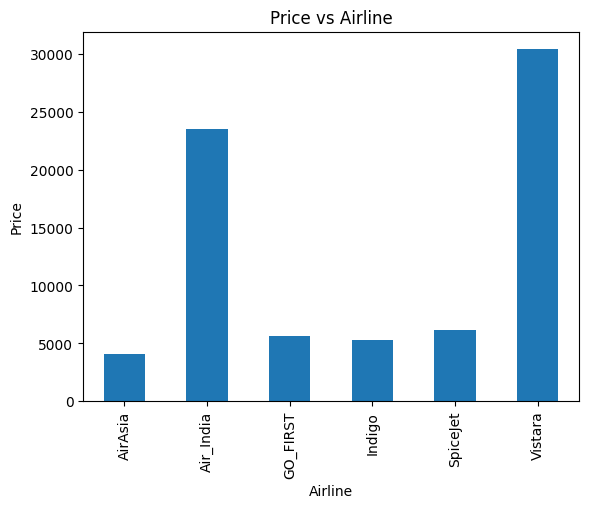

In [23]:
df.groupby('airline')['price'].mean().plot(kind='bar')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.title('Price vs Airline')
plt.show()

vistara has the highset average price followed by air_india

**2. price vs days_left**

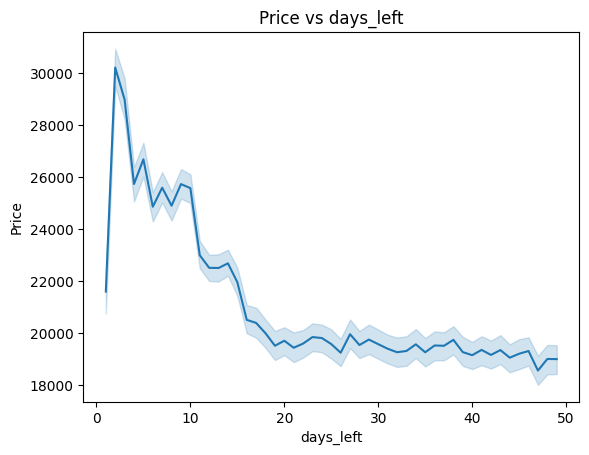

In [31]:
sns.lineplot(df,x=df['days_left'],y=df['price'])
plt.xlabel('days_left')
plt.ylabel('Price')
plt.title('Price vs days_left')
plt.show()

prices are high when difference between booking date and trip date is less  

**3.price w.r.t class**

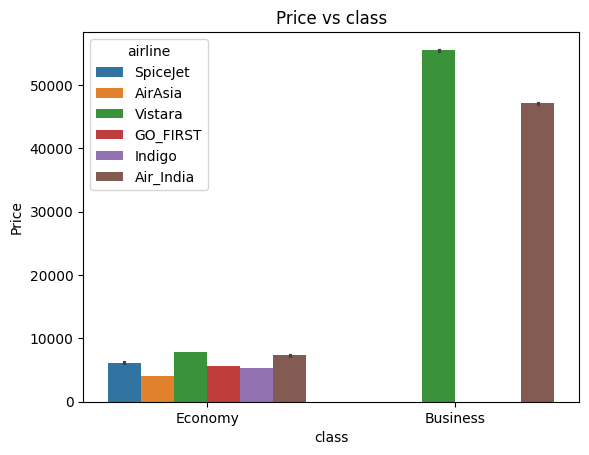

In [34]:
sns.barplot(df,x=df['class'],y=df['price'],hue=df['airline'])
plt.xlabel('class')
plt.ylabel('Price')
plt.title('Price vs class')
plt.show()

In [35]:
df.groupby(['class','airline'])['price'].mean()

class     airline  
Business  Air_India    47131.039212
          Vistara      55477.027777
Economy   AirAsia       4091.072742
          Air_India     7313.682169
          GO_FIRST      5652.007595
          Indigo        5324.216303
          SpiceJet      6179.278881
          Vistara       7806.943645
Name: price, dtype: float64

business class are costlier than economy class

**variation of price vs days_left w.r.t source_city and destinatin city**

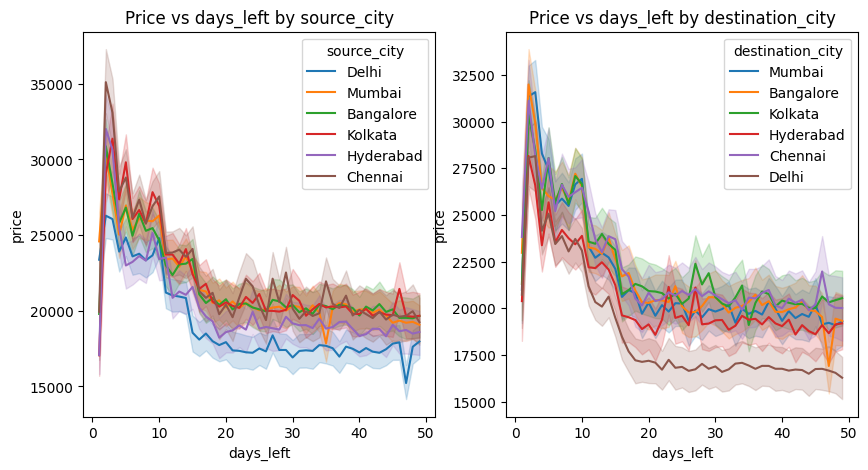

In [41]:
fig,axes=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['source_city'],ax=axes[0])
sns.lineplot(x=df['days_left'],y=df['price'],hue=df['destination_city'],ax=axes[1])
axes[0].set_title('Price vs days_left by source_city')
axes[1].set_title('Price vs days_left by destination_city')
plt.show()

# **Label Encoding**

In [120]:
df.drop('flight',axis=1,inplace=True)

In [121]:
def obj_to_int(df):
    for i in df.columns:
        if df[i].dtype=='object':
            le=LabelEncoder()
            df[i]=le.fit_transform(df[i])
    return df

In [122]:
df=obj_to_int(df)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   source_city       300153 non-null  int64  
 2   departure_time    300153 non-null  int64  
 3   stops             300153 non-null  int64  
 4   arrival_time      300153 non-null  int64  
 5   destination_city  300153 non-null  int64  
 6   class             300153 non-null  int64  
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 22.9 MB


# **Correlation Heatmap**



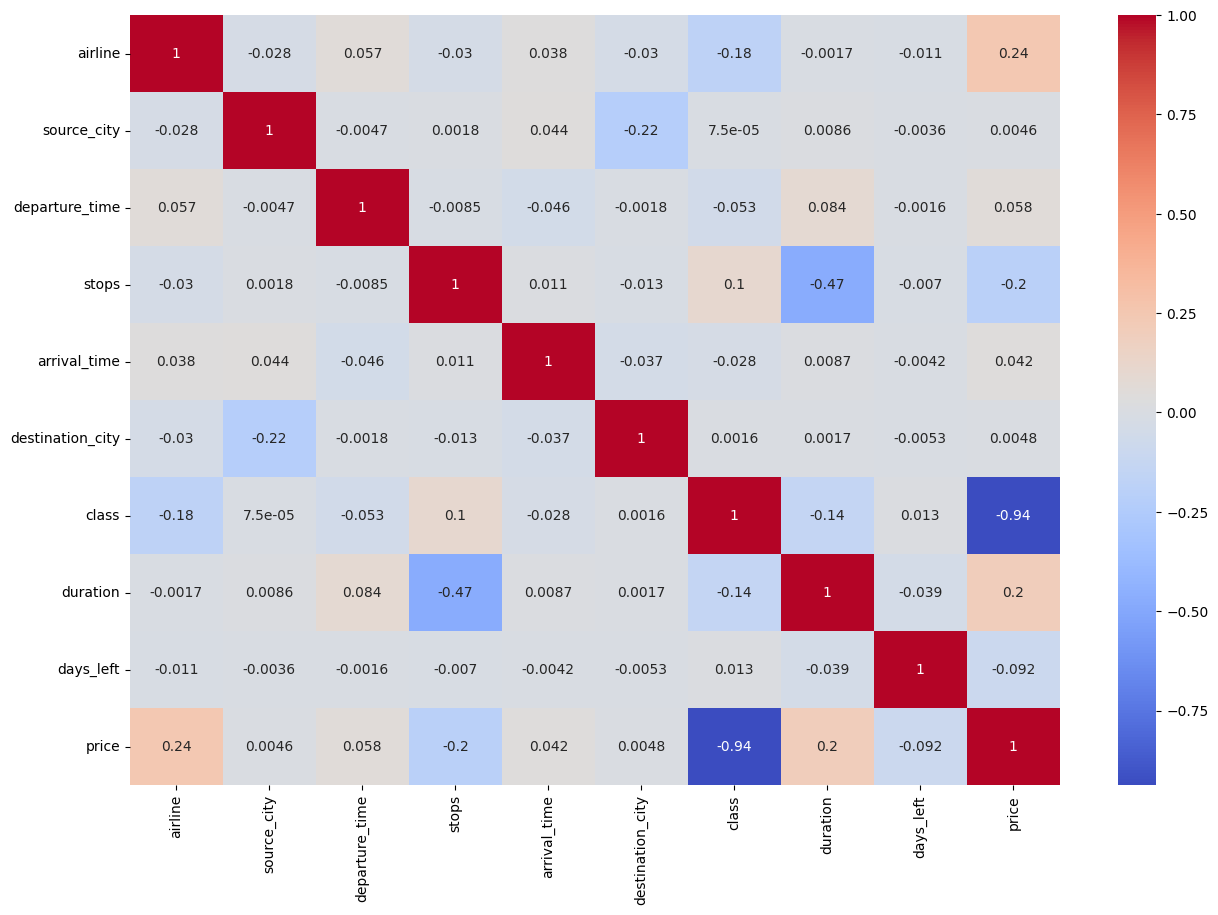

In [124]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

# **Feature Selection**

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [131]:
X= df.drop(columns=['price'])
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data.sort_values(by="VIF", ascending=False, inplace=True)
print(vif_data)

            Feature       VIF
7          duration  4.113876
8         days_left  3.976790
4      arrival_time  3.684550
0           airline  3.393124
1       source_city  2.927766
5  destination_city  2.885337
6             class  2.849370
2    departure_time  2.779427
3             stops  1.426614


# **Linear Regression Model**

In [132]:
x=df.drop('price',axis=1)
y=df['price']

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=99)

**rescaling the train and test**

In [134]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

**Fit the Model to Data**

In [135]:
model1=LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

**predicting on x_test**

In [136]:
pred1=model1.predict(x_test)

**Evaluating the Model Performance**

In [137]:
mse1=mean_squared_error(y_test,pred1)
rmse1=np.sqrt(mse1)
mae1=mean_absolute_error(y_test,pred1)
mape1=mean_absolute_percentage_error(y_test,pred1)
r21=r2_score(y_test,pred1)
print('mean_squared_error:',mse1)
print('root_mean_squared_error:',rmse1)
print('mean_absolute_error:',mae1)
print('mean_absolute_percentage_error:',mape1)
print ('r2_score:',r21)

mean_squared_error: 50151520.3012067
root_mean_squared_error: 7081.773810367477
mean_absolute_error: 4671.841069983171
mean_absolute_percentage_error: 0.4379340172056067
r2_score: 0.9031492785127897


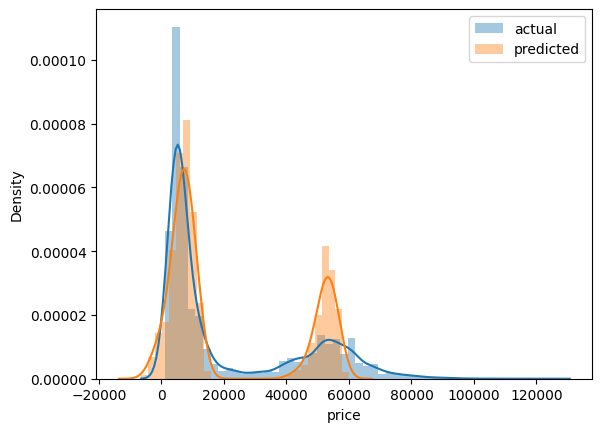

In [148]:
sns.distplot(y_test,label='actual')
sns.distplot(pred1,label='predicted')
plt.legend()
plt.show()

# **DecisionTreeRegressor**

In [138]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [139]:
pred2=dt.predict(x_test)

**Evaluating the Model**

In [140]:
mse2=mean_squared_error(y_test,pred2)
rmse2=np.sqrt(mse2)
mae2=mean_absolute_error(y_test,pred2)
mape2=mean_absolute_percentage_error(y_test,pred2)
r22=r2_score(y_test,pred2)
print('mean_squared_error:',mse2)
print('root_mean_squared_error:',rmse2)
print('mean_absolute_error:',mae2)
print('mean_absolute_percentage_error:',mape2)
print ('r2_score:',r22)

mean_squared_error: 12227897.27222648
root_mean_squared_error: 3496.8410418871604
mean_absolute_error: 1172.7072373718022
mean_absolute_percentage_error: 0.07397087338357106
r2_score: 0.9763859467076189


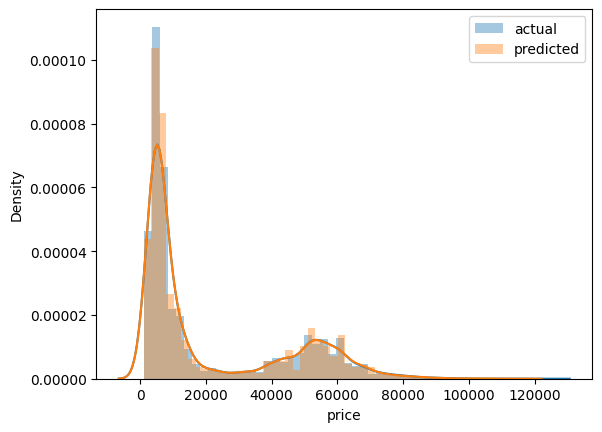

In [149]:
sns.distplot(y_test,label='actual')
sns.distplot(pred2,label='predicted')
plt.legend()
plt.show()

# **RandomForestRegressor**

In [141]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [142]:
pred3=rf.predict(x_test)

**Evaluating the Model Performance**

In [143]:
mse3=mean_squared_error(y_test,pred3)
rmse3=np.sqrt(mse3)
mae3=mean_absolute_error(y_test,pred3)
mape3=mean_absolute_percentage_error(y_test,pred3)
r23=r2_score(y_test,pred3)
print('mean_squared_error:',mse3)
print('root_mean_squared_error:',rmse3)
print('mean_absolute_error:',mae3)
print('mean_absolute_percentage_error:',mape3)
print ('r2_score:',r23)

mean_squared_error: 7883984.31223234
root_mean_squared_error: 2807.8433560710505
mean_absolute_error: 1092.8650442924595
mean_absolute_percentage_error: 0.0704172425534328
r2_score: 0.9847747473207671


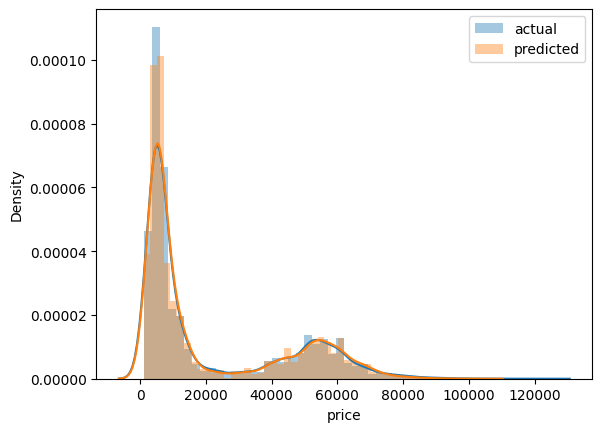

In [150]:
sns.distplot(y_test,label='actual')
sns.distplot(pred3,label='predicted')
plt.legend()
plt.show()